# Extract Colors From Figures:

In [1]:
!pip install webcolors colorthief

In [2]:
import pandas as pd
import io
from urllib.request import urlopen
from colorthief import ColorThief
import webcolors

In [3]:
figures_df = pd.read_csv("./figures_articles_with_path.csv")
figures_df

,year,article_id,figure_name,figure_caption,figure_img,figure_path
0,2010,5169847,Fig. 1.,Block diagram of the RF device.,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\5169847-fig-1-...
1,2010,5169847,Fig. 2.,Percentile variability explained by each princ...,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\5169847-fig-2-...
2,2010,5169847,Fig. 3.,Projection of devices onto the top three princ...,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\5169847-fig-3-...
3,2010,5169847,Fig. 4.,Zoom in the core of functional devices in the ...,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\5169847-fig-4-...
4,2010,5169847,Fig. 5.,"Test error (i.e., average number of misclassif...",https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\5169847-fig-5-...
...,...,...,...,...,...,...
10788,2023,10121783,FIGURE 1.,Overview of the different FL scenarios.,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\guerr1-3274394...
10789,2023,10121783,FIGURE 2.,Overview of the operations executed by a node ...,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\guerr2-3274394...
10790,2023,10121783,FIGURE 3.,Distribution of samples across the four first ...,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\guerr3-3274394...
10791,2023,10121783,FIGURE 4.,Training and validation accuracy on EMNIST and...,https://ieeexplore.ieee.org/mediastore_new/IEE...,C:\Users\USER\Documents\figures\guerr4-3274394...


In [ ]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS21_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

def get_five_dominate_colors(image_path):
    color_thief = ColorThief(image_path)
    colors_name = set([get_colour_name(rgb_color)[1] for rgb_color in color_thief.get_palette(color_count=5)])
    return colors_name


In [ ]:
%%time
figures_df["colors"] = figures_df["figure_path"].apply(lambda image_path: get_five_dominate_colors(image_path))
figures_df.to_csv("./figures_articles_with_path_with_colors.csv", index=False)

# Evaluate the Color Extractor:

In [8]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [2]:
figures_df = pd.read_csv("./figures_articles_with_path_with_colors.csv")

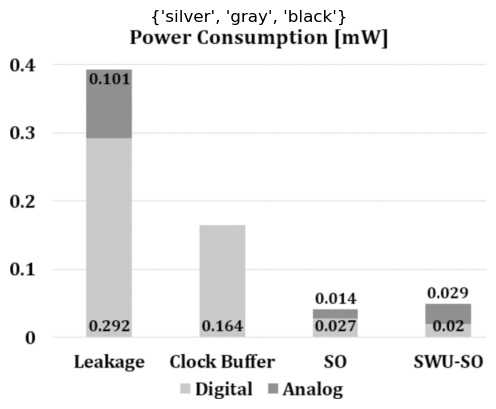

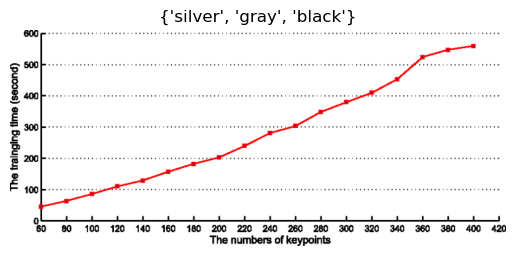

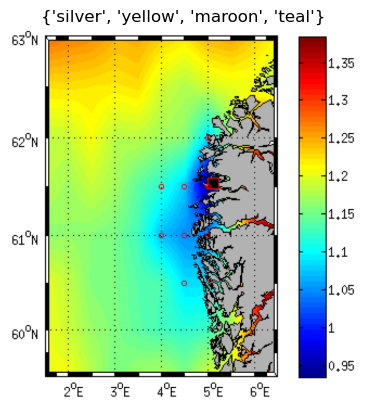

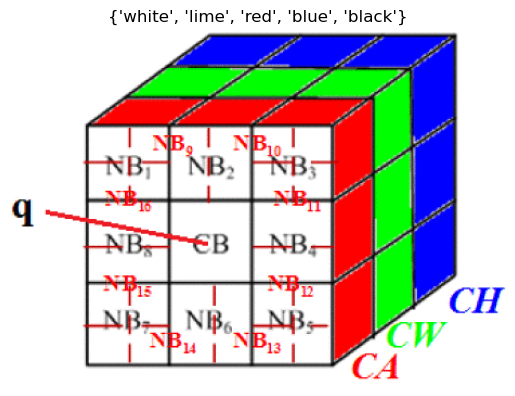

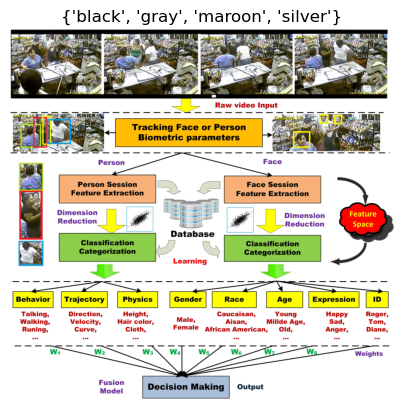

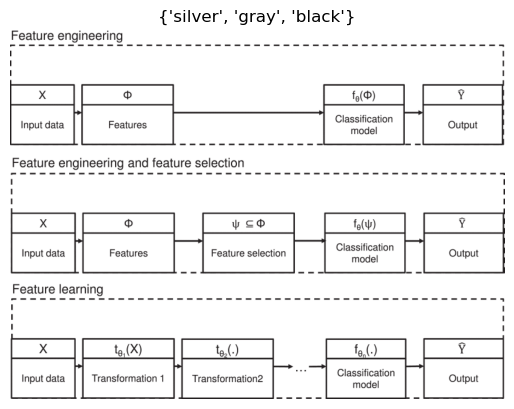

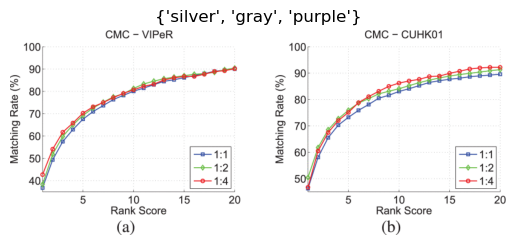

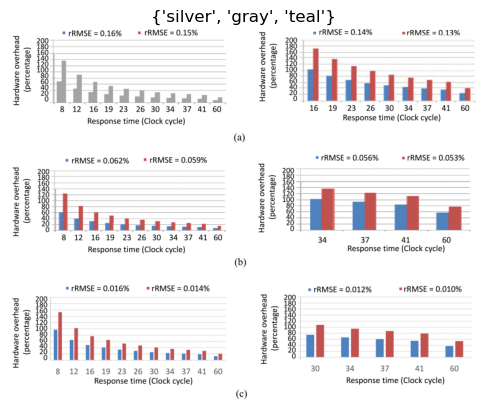

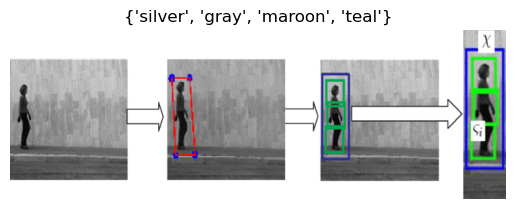

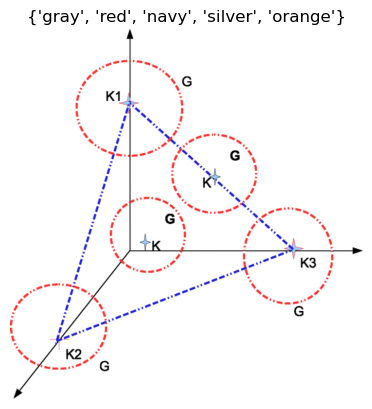

In [10]:
for i in range(10):
    random_row = figures_df.sample()
    # Load the image from the URL using PIL
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    response = requests.get(random_row["figure_img"].values[0], headers=headers)
    image_data = response.content
    image = Image.open(BytesIO(image_data))

    # Display the image using matplotlib
    plt.title(random_row["colors"].values[0])
    plt.imshow(image)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()